In [3]:
import numpy as np
from rich import print
from rich.pretty import pprint
import PIL as pil
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from IPython.display import HTML
from typing import Tuple, Literal
from SOM import SOM as SelfOrgMap

In [43]:
# load data
columns=[
                     "sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
dataFrame = pd.read_csv("iris.data", names=columns)


print(dataFrame["class"].unique())
print(dataFrame.head())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [44]:
iris_data = dataFrame[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
print(iris_data.shape)
print(iris_data[:5])

(150, 4)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Training SOM with 1x3 map, max_iter=3000, sigma=1, lr=1 and random_state=1

Predictions  : [0 1 2]

Actual labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

(3, 2)

Accuracy: 84.67%

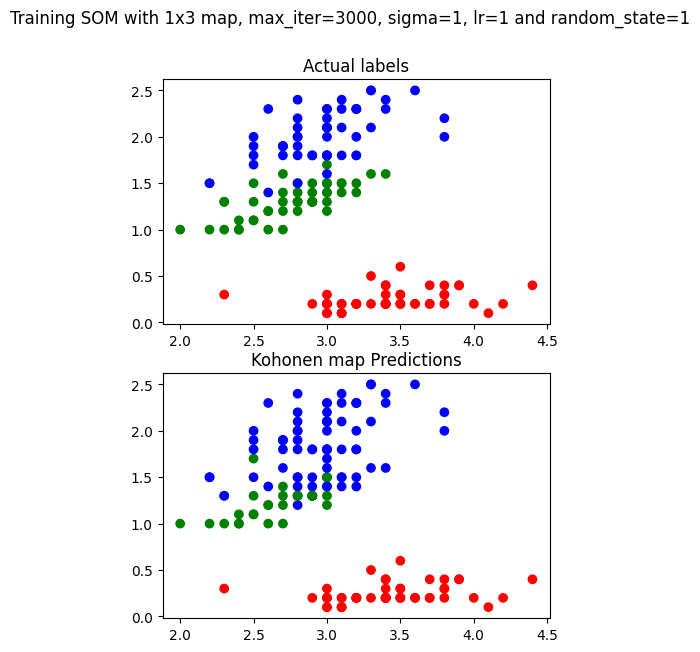

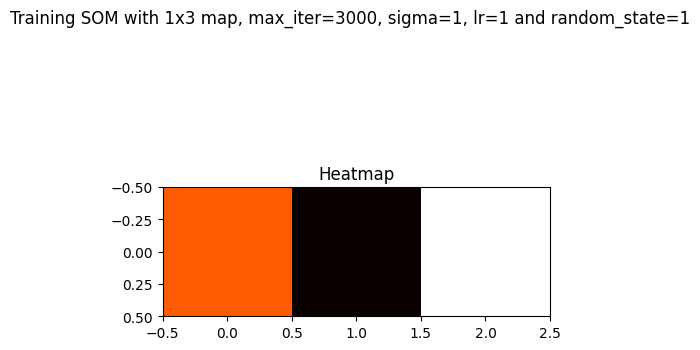

Training SOM with 1x3 map, max_iter=3000, sigma=1, lr=1 and random_state=1

Predictions  : [0 1 2]

Actual labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

(3, 2)

Accuracy: 88.67%

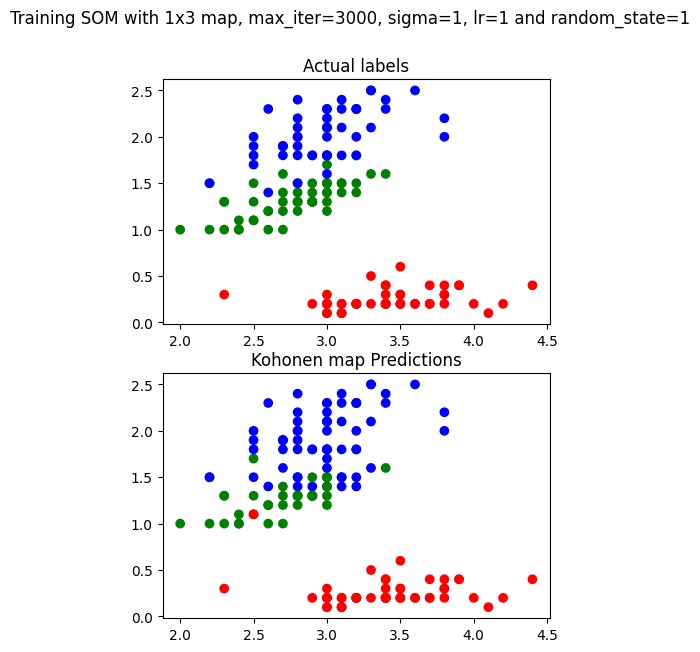

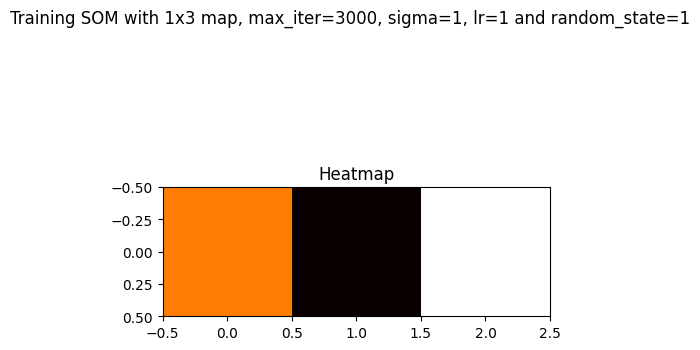

Training SOM with 3x1 map, max_iter=3000, sigma=1, lr=1 and random_state=1

Predictions  : [0 1 2]

Actual labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

(3, 2)

Accuracy: 44.67%

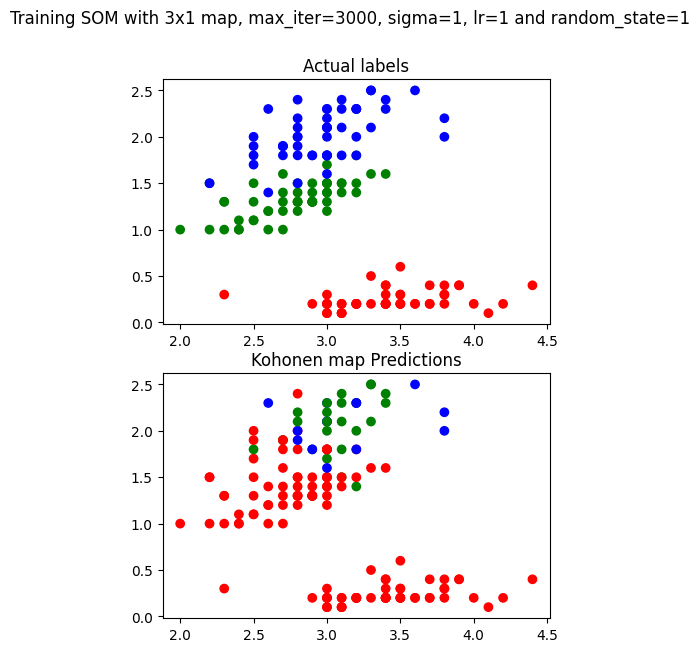

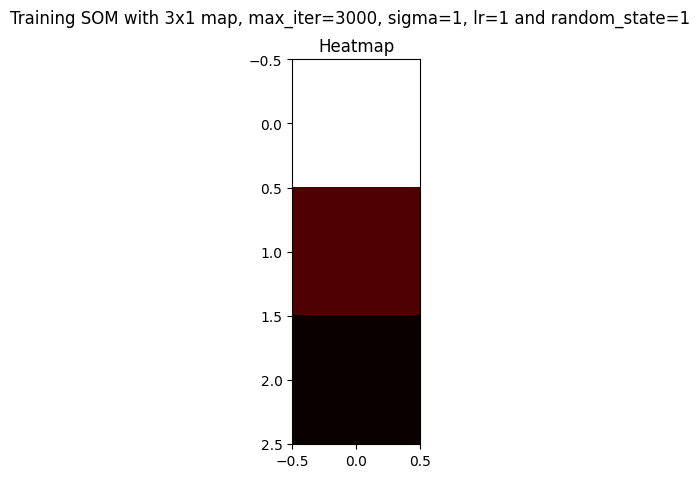

Training SOM with 9x9 map, max_iter=3000, sigma=1, lr=1 and random_state=None

Predictions  : [10 18 19 20 27 28 29 30 36 37 38 40 41 45 46 47 49 50 54 55 57 58 59 65
 66]

Actual labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

(81, 2)

Accuracy: 0.00%

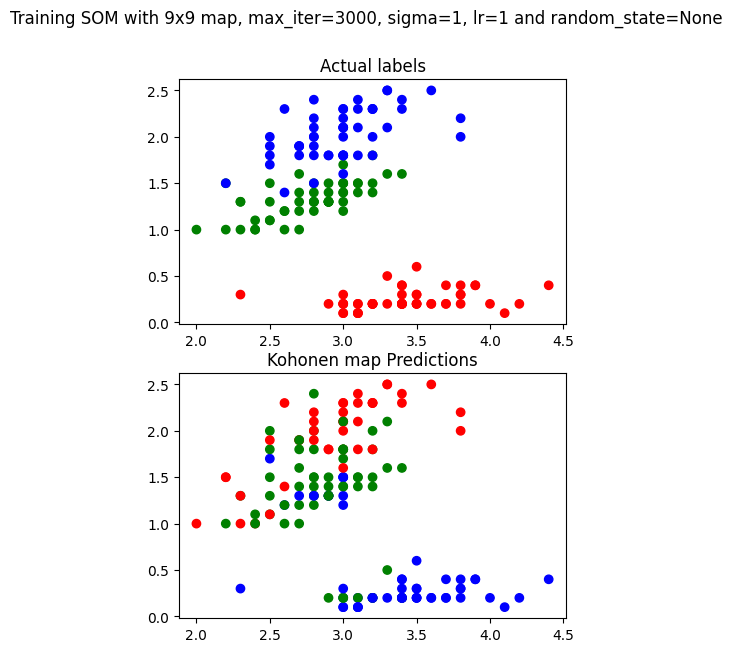

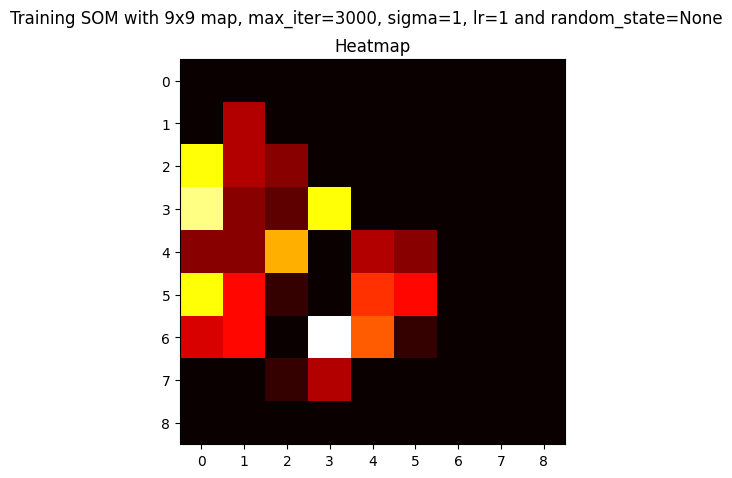

In [77]:
do_plot = True


def runTest(
    n: int = 1,
    m: int = 3,
    lr: float = 1,
    sigma: float = 1,
    max_iter: int = 3000,
    random_state: int = 1234,
    epochs=1,
    shuffle=False,
) -> np.ndarray:
    selfOrgMap = SelfOrgMap(
        m=n,
        n=m,
        dim=4,
        lr=lr,
        sigma=sigma,
        max_iter=max_iter,
        random_state=random_state,
    )
    title = f"Training SOM with {n}x{m} map, max_iter={max_iter}, sigma={sigma}, lr={lr} and random_state={random_state}"
    print(title)
    selfOrgMap.fit(iris_data, shuffle=shuffle, epochs=epochs)

    predictions = selfOrgMap.predict(iris_data)
    print(f"Predictions  : {np.unique(predictions)}")
    # replace labels with its corresponding number
    actual_labels = [x for x in dataFrame["class"].unique()]
    print(f"Actual labels: {dataFrame['class'].unique()}")

    iris_label = dataFrame["class"].map(
        {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
    )
    print(selfOrgMap._locations.shape)
    if do_plot:
        fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 7))
        fig.suptitle(title)
        x = iris_data[:, 1]
        y = iris_data[:, 3]
        colors = ["red", "green", "blue"]
        ax[0].scatter(x, y, c=iris_label, cmap=ListedColormap(colors))
        ax[0].title.set_text("Actual labels")
        #
        ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
        ax[1].title.set_text("Kohonen map Predictions")

    # check accuracy
    accuracy = np.sum(predictions == iris_label) / len(iris_label)
    print(f"Accuracy: {accuracy*100:.2f}%")
    
    
    
    # heatmap
    heatmap = np.zeros((n, m)).flatten()
    for i in predictions:
        heatmap[i] += 1
    # reshape
    heatmap = heatmap.reshape((n, m))
    # normalize
    heatmap = heatmap
    # plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
    fig.suptitle(title)
    ax.imshow(heatmap, cmap="hot", interpolation="nearest")
    ax.title.set_text("Heatmap")

    # plot
    plt.show()
    return accuracy


tests = [
    {
        "n": 1,
        "m": 3,
        "lr": 1,
        "sigma": 1,
        "max_iter": 3000,
        "random_state": 1,
        "epochs": 1,
        "shuffle": True,
    },
    {
        "n": 1,
        "m": 3,
        "lr": 1,
        "sigma": 1,
        "max_iter": 3000,
        "random_state": 1,
        "epochs": 3,
        "shuffle": True,
    },
    {
        "n": 3,
        "m": 1,
        "lr": 1,
        "sigma": 1,
        "max_iter": 3000,
        "random_state": 1,
        "epochs": 1,
        "shuffle": False,
    },
    {
        "n": 9,
        "m": 9,
        "lr": 1,
        "sigma": 1,
        "max_iter": 3000,
        "random_state": None,
        "epochs": 1,
        "shuffle": True,
    },
]
for test in tests:
    runTest(**test)
